In [1]:
import pandas  as  pd
import  numpy  as np
import  seaborn as  sns
import  matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import skew,norm
from scipy.stats.stats import pearsonr

In [2]:
train = pd.read_csv('training_set.csv')

In [3]:
test = pd.read_csv('test_set.csv')

In [4]:
games = pd.read_csv('game_data.csv')

In [5]:
players = pd.read_csv('player_data.csv')

In [8]:
train.head()

,Season,Game_ID,Game_Date,Away_Team,Home_Team,Country,Rounded Viewers
0,2016-17,21600001,10/25/2016,NYK,CLE,C113,18
1,2016-17,21600001,10/25/2016,NYK,CLE,C193,1
2,2016-17,21600001,10/25/2016,NYK,CLE,C126,4
3,2016-17,21600001,10/25/2016,NYK,CLE,C163,11
4,2016-17,21600001,10/25/2016,NYK,CLE,C73,3


In [123]:
games.head()

,Season,Game_ID,Game_Date,Team,Location,Wins_Entering_Gm,Losses_Entering_Gm,Team_Minutes,Final_Score,Lead_Changes,Ties,Largest_Lead,Full_Timeouts,Short_Timeouts,Qtr_4_Score,L2M_Score
0,2016-17,21600001,10/25/2016,CLE,H,0,0,240.0,117.0,1.0,3.0,32.0,4.0,1.0,82.0,113.0
1,2016-17,21600001,10/25/2016,NYK,A,0,0,240.0,88.0,0.0,1.0,4.0,4.0,2.0,64.0,84.0
2,2016-17,21600002,10/25/2016,POR,H,0,0,240.0,113.0,6.0,6.0,13.0,5.0,0.0,77.0,104.0
3,2016-17,21600002,10/25/2016,UTA,A,0,0,240.0,104.0,5.0,1.0,8.0,5.0,2.0,83.0,102.0
4,2016-17,21600003,10/25/2016,GSW,H,0,0,240.0,100.0,1.0,2.0,4.0,3.0,1.0,77.0,100.0


In [10]:
players.head()

,Season,Game_ID,Game_Date,Team,Person_ID,Name,ASG_Team,Active_Status,Minutes,Points,...,Steals,Blocks,Turnovers,Field_Goals,Field_Goals_Attempted,Three_Pointers,Three_Pointers_Attempted,Free_Throws,Free_Throws_Attempted,Personal_Fouls
0,2016-17,21600001,10/25/2016,CLE,101112,Channing Frye,None,Active,14.0,6.0,...,1.0,1.0,1.0,2.0,6.0,2.0,5.0,0.0,0.0,4.0
1,2016-17,21600001,10/25/2016,CLE,201567,Kevin Love,East ASG,Active,25.0,23.0,...,3.0,0.0,2.0,6.0,15.0,2.0,6.0,9.0,12.0,3.0
2,2016-17,21600001,10/25/2016,CLE,202681,Kyrie Irving,East ASG,Active,30.0,29.0,...,2.0,0.0,0.0,12.0,22.0,4.0,7.0,1.0,1.0,1.0
3,2016-17,21600001,10/25/2016,CLE,202684,Tristan Thompson,None,Active,22.0,0.0,...,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0
4,2016-17,21600001,10/25/2016,CLE,202697,Iman Shumpert,None,Active,14.0,2.0,...,0.0,1.0,2.0,1.0,3.0,0.0,1.0,0.0,0.0,2.0


In [16]:
games.dtypes

Season                 object
Game_ID                 int64
Game_Date              object
Team                   object
Location               object
Wins_Entering_Gm        int64
Losses_Entering_Gm      int64
Team_Minutes          float64
Final_Score           float64
Lead_Changes          float64
Ties                  float64
Largest_Lead          float64
Full_Timeouts         float64
Short_Timeouts        float64
Qtr_4_Score           float64
L2M_Score             float64
dtype: object

In [168]:
train.dtypes

Season                     object
Game_ID                     int64
Game_Date          datetime64[ns]
Away_Team                  object
Home_Team                  object
Country                    object
Rounded Viewers             int64
year                        int64
month                       int64
day                         int64
weekday                     int64
weekday_name               object
dtype: object

In [27]:
players.head()

,Season,Game_ID,Game_Date,Team,Person_ID,Name,ASG_Team,Active_Status,Minutes,Points,...,Steals,Blocks,Turnovers,Field_Goals,Field_Goals_Attempted,Three_Pointers,Three_Pointers_Attempted,Free_Throws,Free_Throws_Attempted,Personal_Fouls
0,2016-17,21600001,10/25/2016,CLE,101112,Channing Frye,None,Active,14.0,6.0,...,1.0,1.0,1.0,2.0,6.0,2.0,5.0,0.0,0.0,4.0
1,2016-17,21600001,10/25/2016,CLE,201567,Kevin Love,East ASG,Active,25.0,23.0,...,3.0,0.0,2.0,6.0,15.0,2.0,6.0,9.0,12.0,3.0
2,2016-17,21600001,10/25/2016,CLE,202681,Kyrie Irving,East ASG,Active,30.0,29.0,...,2.0,0.0,0.0,12.0,22.0,4.0,7.0,1.0,1.0,1.0
3,2016-17,21600001,10/25/2016,CLE,202684,Tristan Thompson,None,Active,22.0,0.0,...,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0
4,2016-17,21600001,10/25/2016,CLE,202697,Iman Shumpert,None,Active,14.0,2.0,...,0.0,1.0,2.0,1.0,3.0,0.0,1.0,0.0,0.0,2.0


In [69]:
# sorted list of player columns - easier to delete lexographically 
# sorted((list(players.columns)), key=str.lower)

In [21]:
#save the ID column#save th 
train_ID = train['Game_ID']
test_ID = test['Game_ID']

#Drop the ID column since it is unnecessary for the prediction process
train.drop("Game_ID", axis = 1, inplace = True)
test.drop("Game_ID", axis = 1, inplace= True)

In [23]:
print ("Train data: \n")
print ("Number of columns: " + str (train.shape[1]))
print ("number of rows: " + str (train.shape[0]))

print('\nTest data: \n')
print ("Number of columns:" + str (test.shape[1]))
print ("Number of rows:" +  str (test.shape[0]))

Train data: 

Number of columns: 6
number of rows: 280625

Test data: 

Number of columns:5
Number of rows:460


In [29]:
train[train['Country'] == 'C56'].head(4)

,Season,Game_Date,Away_Team,Home_Team,Country,Rounded Viewers
71,2016-17,10/25/2016,NYK,CLE,C56,153
249,2016-17,10/25/2016,SAS,GSW,C56,213
429,2016-17,10/25/2016,UTA,POR,C56,134
589,2016-17,10/26/2016,BKN,BOS,C56,55


In [6]:
# convert date to datetime
train.Game_Date = pd.to_datetime(train.Game_Date)
train['year'] = train.Game_Date.dt.year
train['month'] = train.Game_Date.dt.month
train['day'] = train.Game_Date.dt.day
train['weekday'] = train.Game_Date.dt.weekday
train['weekday_name'] = train.Game_Date.dt.weekday_name

In [207]:
train.weekday_name.describe()

count        280625
unique            7
top       Wednesday
freq          53785
Name: weekday_name, dtype: object

In [7]:
import os

currentDir = os.getcwd()

player_social_influence = pd.read_csv(currentDir + "/social-power-nba/nba_2017_players_with_salary_wiki_twitter.csv", index_col = 0); player_social_influence.head() 

,Rk,PLAYER,POSITION,AGE,MP,FG,FGA,FG%,3P,3PA,...,DRPM,RPM,WINS_RPM,PIE,PACE,W,SALARY_MILLIONS,PAGEVIEWS,TWITTER_FAVORITE_COUNT,TWITTER_RETWEET_COUNT
0,1,Russell Westbrook,PG,28,34.6,10.2,24.0,0.425,2.5,7.2,...,-0.47,6.27,17.34,23.0,102.31,46,26.50,4279.0,2130.5,559.0
1,2,James Harden,PG,27,36.4,8.3,18.9,0.440,3.2,9.3,...,-1.57,4.81,15.54,19.0,102.98,54,26.50,3279.0,969.0,321.5
2,4,Anthony Davis,C,23,36.1,10.3,20.3,0.505,0.5,1.8,...,3.90,4.35,12.81,19.2,100.19,31,22.12,82.5,368.0,104.0
3,6,DeMarcus Cousins,C,26,34.2,9.0,19.9,0.452,1.8,5.0,...,0.64,4.20,11.26,17.8,97.11,30,16.96,1625.5,102.0,91.5
4,7,Damian Lillard,PG,26,35.9,8.8,19.8,0.444,2.9,7.7,...,-1.49,3.14,10.72,15.9,99.68,38,24.33,1830.5,186.5,43.0


In [26]:
# replace null values for TWITTER_RETWEET_COUNT, replacing with zero since 0 means that there is no data/no account
player_social_influence.TWITTER_RETWEET_COUNT.fillna(0, inplace = True)

In [8]:
# convert ASG_Team to dummy variable
players['AllStar'] = [0 if x == 'None' else 1 for x in players.ASG_Team]

In [9]:
players.drop('ASG_Team', inplace=True, axis=1)

In [10]:
players.drop([
 'Assists',
 'Blocks',
 'Defensive_Rebounds',
 'Field_Goals',
 'Field_Goals_Attempted',
 'Free_Throws',
 'Free_Throws_Attempted',
 'Offensive_Rebounds',
 'Personal_Fouls',
 'Points',
 'Steals',
 'Team',
 'Three_Pointers',
 'Three_Pointers_Attempted',
 'Turnovers'], inplace=True, axis = 1)

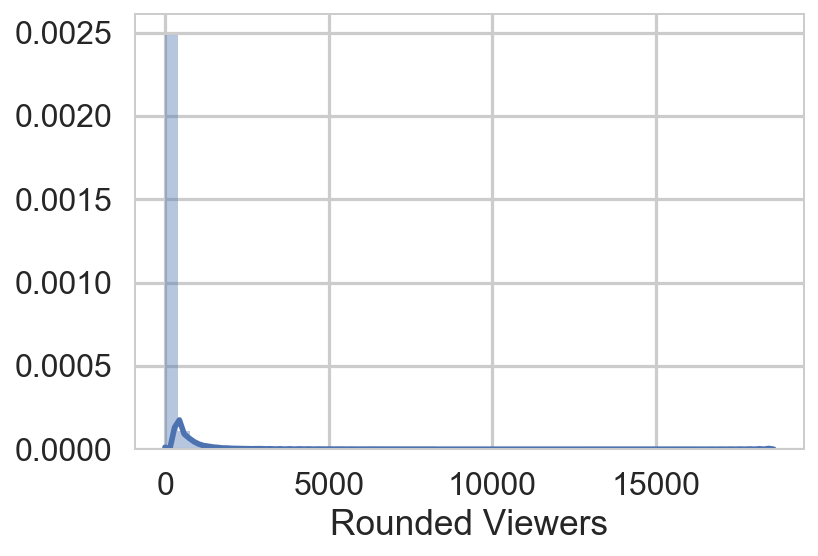

In [136]:
sns.distplot(train['Rounded Viewers'])

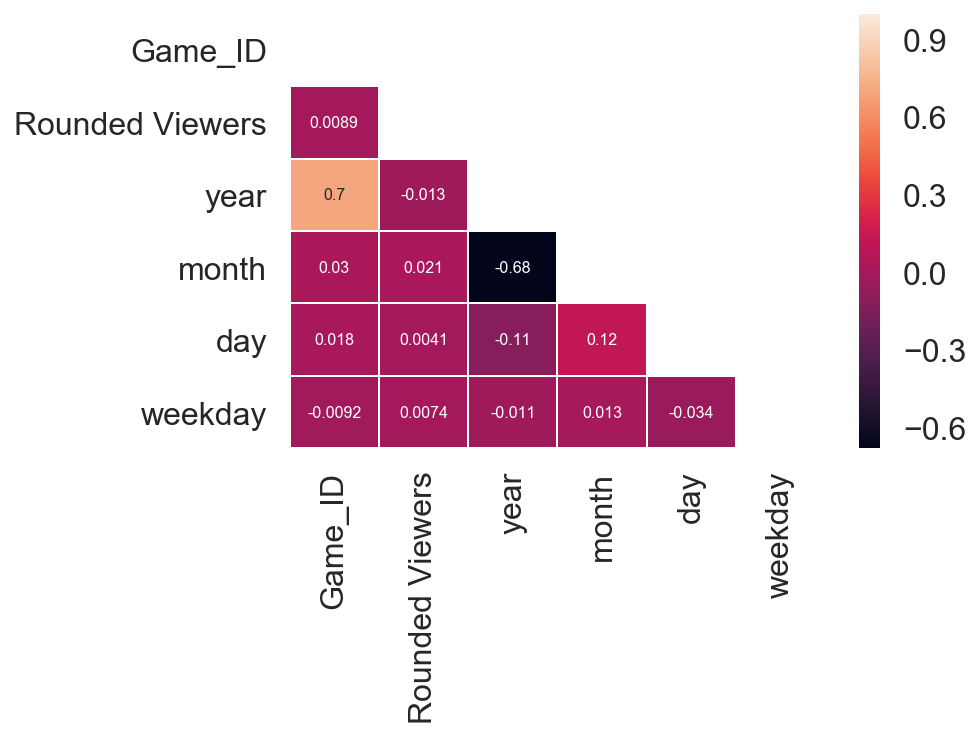

In [137]:
corr = train.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, annot=True, linewidth=0.5, mask=mask, annot_kws={"size": 8})

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

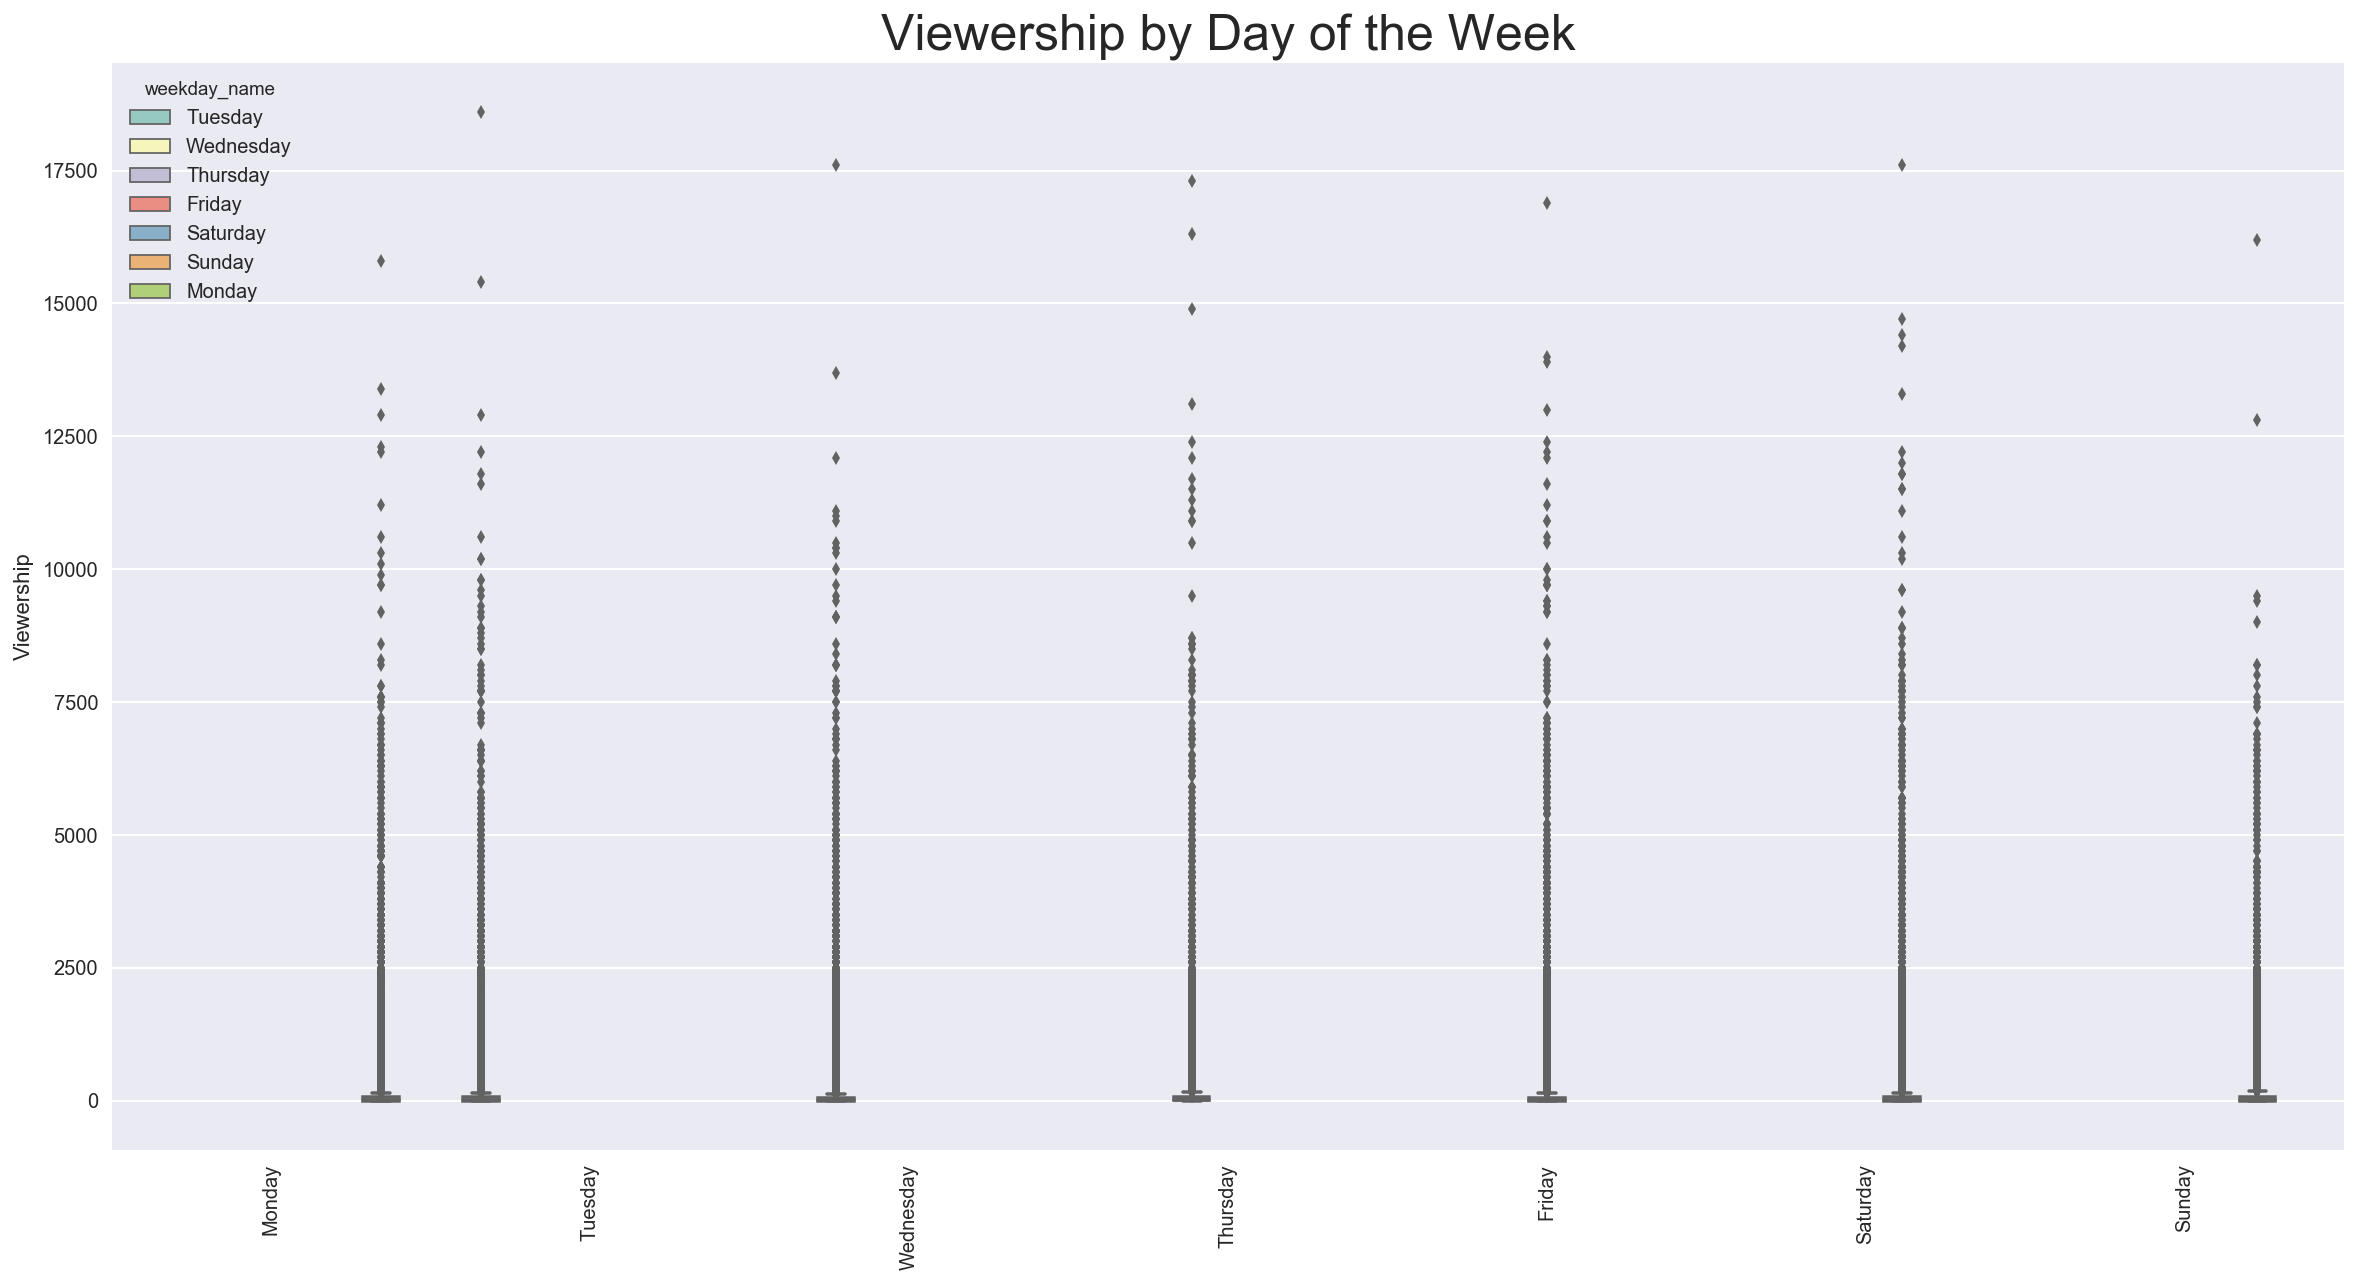

In [165]:
sns.set(rc={"figure.figsize": (20, 10)})

order=['Monday',  'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

sns.boxplot(x='weekday_name', y='Rounded Viewers', data=train, order=order,
            palette="Set3",  hue="weekday_name")
plt.title('Viewership by Day of the Week', fontsize=25)
plt.xlabel('')
plt.ylabel('Viewership')
sns.set_style('whitegrid')
sns.set_context('poster')
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)

In [190]:
# games.groupby('Game_ID')['Wins_Entering_Gm'].diff()
games[4898:4900]

,Season,Game_ID,Game_Date,Team,Location,Wins_Entering_Gm,Losses_Entering_Gm,Team_Minutes,Final_Score,Lead_Changes,Ties,Largest_Lead,Full_Timeouts,Short_Timeouts,Qtr_4_Score,L2M_Score
4898,2017-18,21701220,4/11/2018,CLE,H,50,31,240.0,98.0,1.0,2.0,8.0,6.0,0.0,71.0,91.0
4899,2017-18,21701220,4/11/2018,NYK,A,28,53,240.0,110.0,1.0,1.0,22.0,4.0,0.0,84.0,105.0


In [223]:
result = pd.concat(frames, keys=['Game_ID'])

,Season,Game_ID,Game_Date,Away_Team,Home_Team,Country,Rounded Viewers,year,month,day,weekday,weekday_name,Team,Location,Wins_Entering_Gm,Losses_Entering_Gm,Team_Minutes,Final_Score,Lead_Changes,Ties,Largest_Lead,Full_Timeouts,Short_Timeouts,Qtr_4_Score,L2M_Score


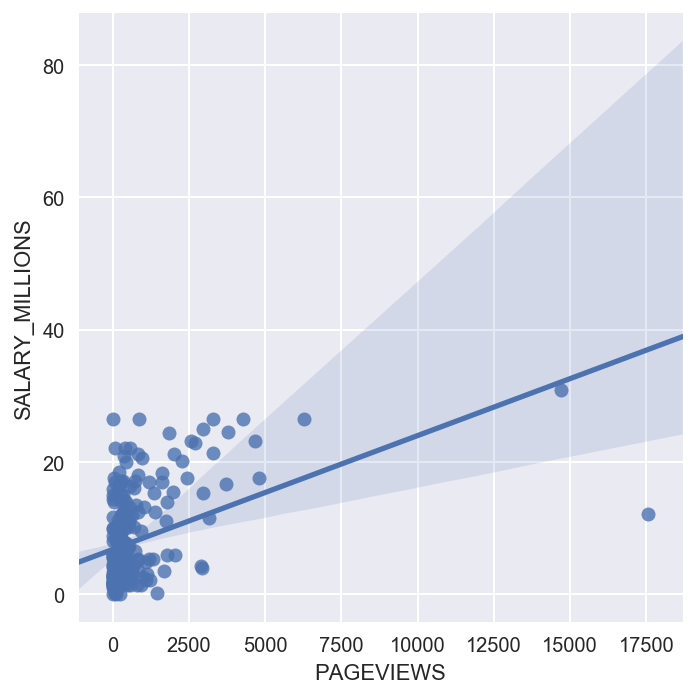

In [193]:
# Relationship between SALARY_MILLIONS and PAGEVIEWS
sns.lmplot(x="PAGEVIEWS", y="SALARY_MILLIONS", data=player_social_influence)

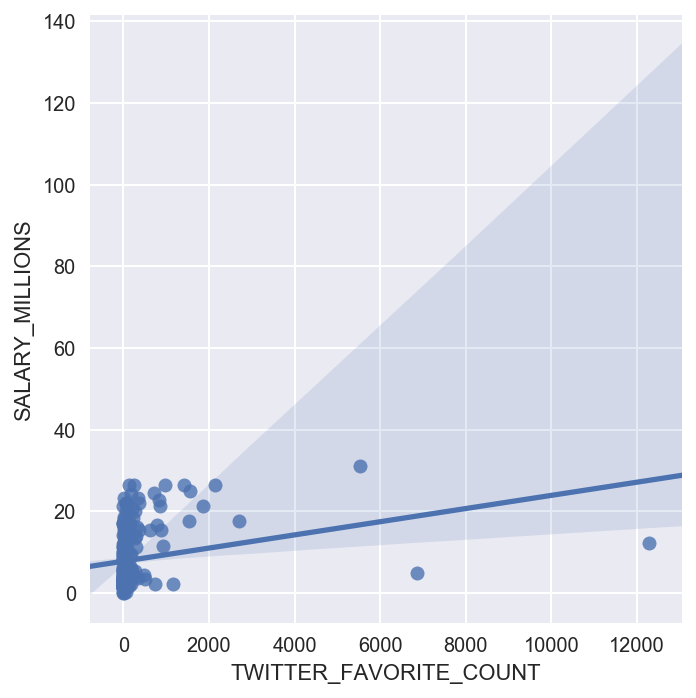

In [194]:
# Relationship between SALARY_MILLIONS and TWITTER_FAVORITE_COUNT
sns.lmplot(x="TWITTER_FAVORITE_COUNT", y="SALARY_MILLIONS", data=player_social_influence)

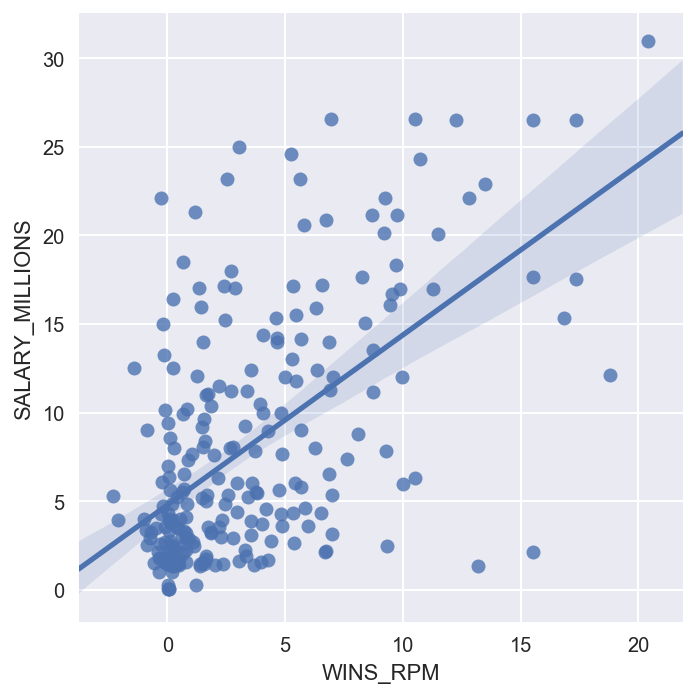

In [196]:
# Relationship between SALARY_MILLIONS and WINS_RPM
sns.lmplot(x="WINS_RPM", y="SALARY_MILLIONS", data=player_social_influence)

In [198]:
import statsmodels.formula.api as smf
# Relationship between SALARY_MILLIONS and Social Influence
results = smf.ols(formula='SALARY_MILLIONS ~ PAGEVIEWS + TWITTER_FAVORITE_COUNT + TWITTER_RETWEET_COUNT', data=player_social_influence).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        SALARY_MILLIONS   R-squared:                       0.234
Model:                            OLS   Adj. R-squared:                  0.224
Method:                 Least Squares   F-statistic:                     23.59
Date:                Sun, 24 Jun 2018   Prob (F-statistic):           2.30e-13
Time:                        13:43:47   Log-Likelihood:                -761.33
No. Observations:                 236   AIC:                             1531.
Df Residuals:                     232   BIC:                             1545.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  6

In [199]:
# Relationship between Player's performance and WINS_RPM
result = smf.ols(formula='WINS_RPM ~ POINTS + TRB + AST + STL + BLK + TOV + PF', data=player_social_influence).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               WINS_RPM   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     101.7
Date:                Sun, 24 Jun 2018   Prob (F-statistic):           6.21e-67
Time:                        13:44:12   Log-Likelihood:                -513.78
No. Observations:                 239   AIC:                             1044.
Df Residuals:                     231   BIC:                             1071.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.6034      0.441     -5.897      0.0

In [224]:
train_numerical_columns = train.describe().columns
train_numerical_columns

Index(['Game_ID', 'Rounded Viewers', 'year', 'month', 'day', 'weekday'], dtype='object')

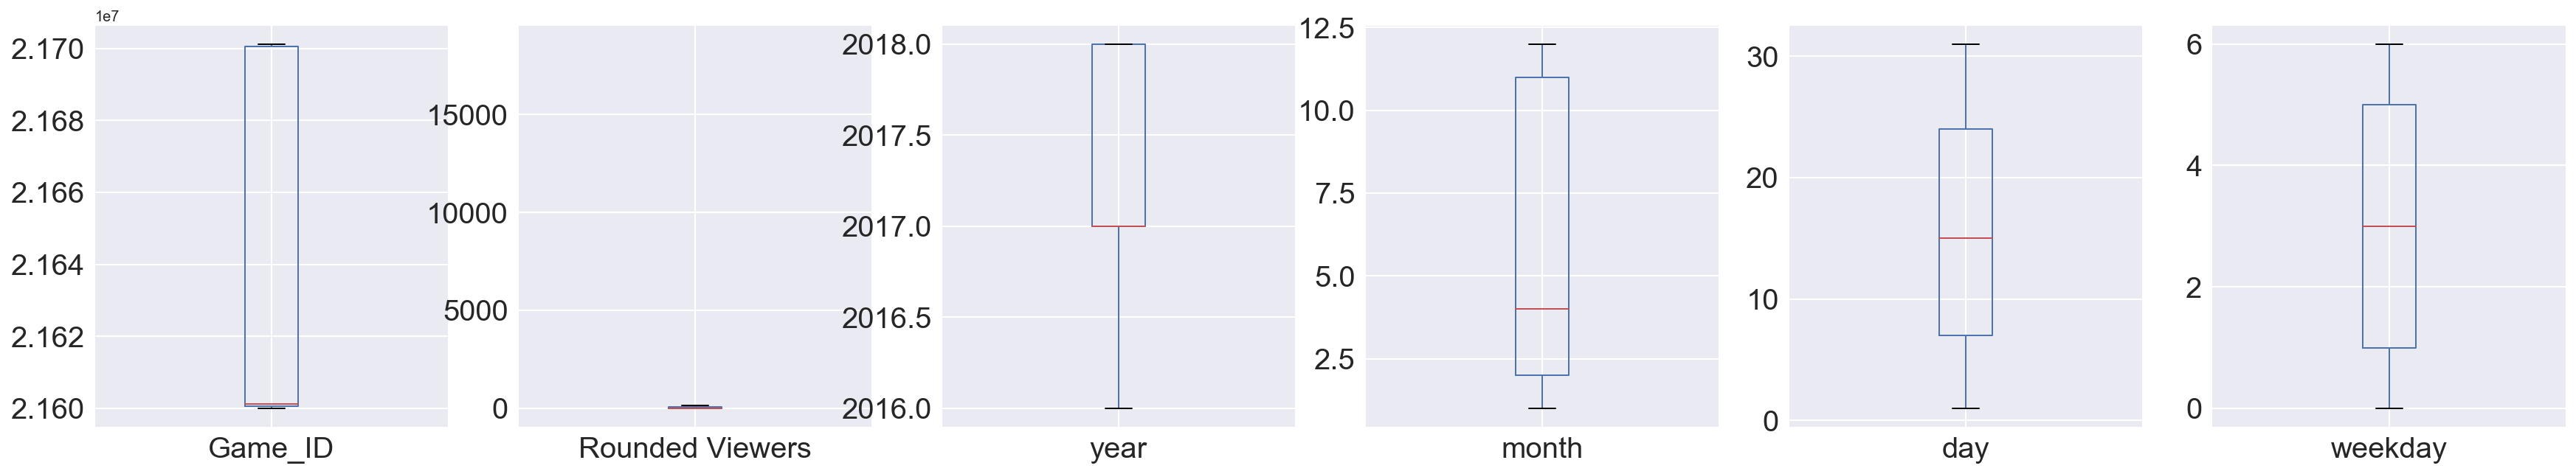

In [227]:
%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt
sns.set_style("darkgrid")
plt.figure(figsize=(30,5))
for i,col in enumerate(train_numerical_columns):
    plt.subplot(1,len(train_numerical_columns),i + 1)
    train[[col]].boxplot(fontsize=20)

In [233]:
def describe_categorical_values(df, non_interesting_columns=[], num_categories=5):
    values_df = pd.DataFrame()
    for i, column in enumerate(df.columns):
        if column in non_interesting_columns:
            continue
        top_values0 = ["{}: {}%".format(x,int(round(100*y/len(df))))
                       for x, y in zip(df[column].value_counts(dropna=False).head(num_categories).index,
                                       df[column].value_counts(dropna=False).head(num_categories).values)]
        if len(top_values0) < num_categories:
            top_values = [None]*num_categories
            top_values[:len(top_values0)] = top_values0
        else:
            top_values = top_values0
        values_df[column] = top_values
    return values_df.transpose()

describe_categorical_values(train, non_interesting_columns=train_numerical_columns, num_categories=2)

,0,1
Season,2016-17: 52%,2017-18: 48%
Game_Date,2016-11-25 00:00:00: 1%,2017-03-11 00:00:00: 1%
Away_Team,GSW: 4%,CLE: 4%
Home_Team,GSW: 4%,CLE: 4%
Country,C49: 1%,C181: 1%
weekday_name,Wednesday: 19%,Friday: 17%


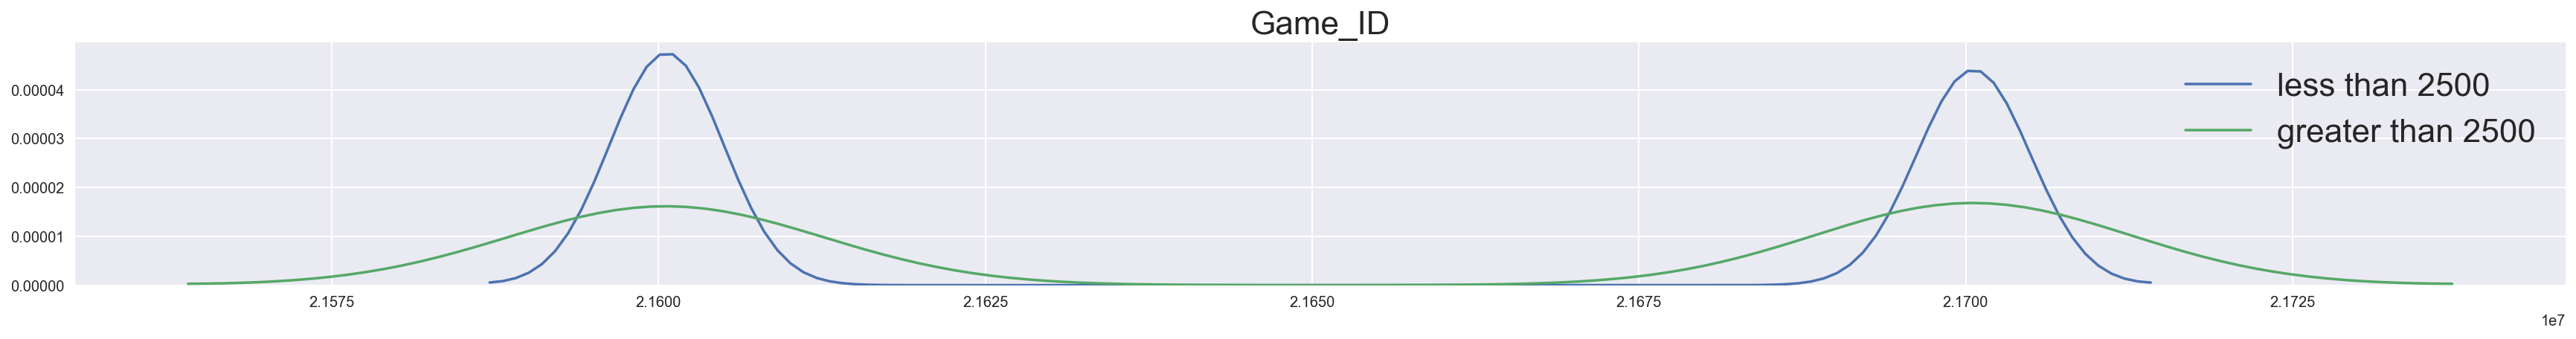

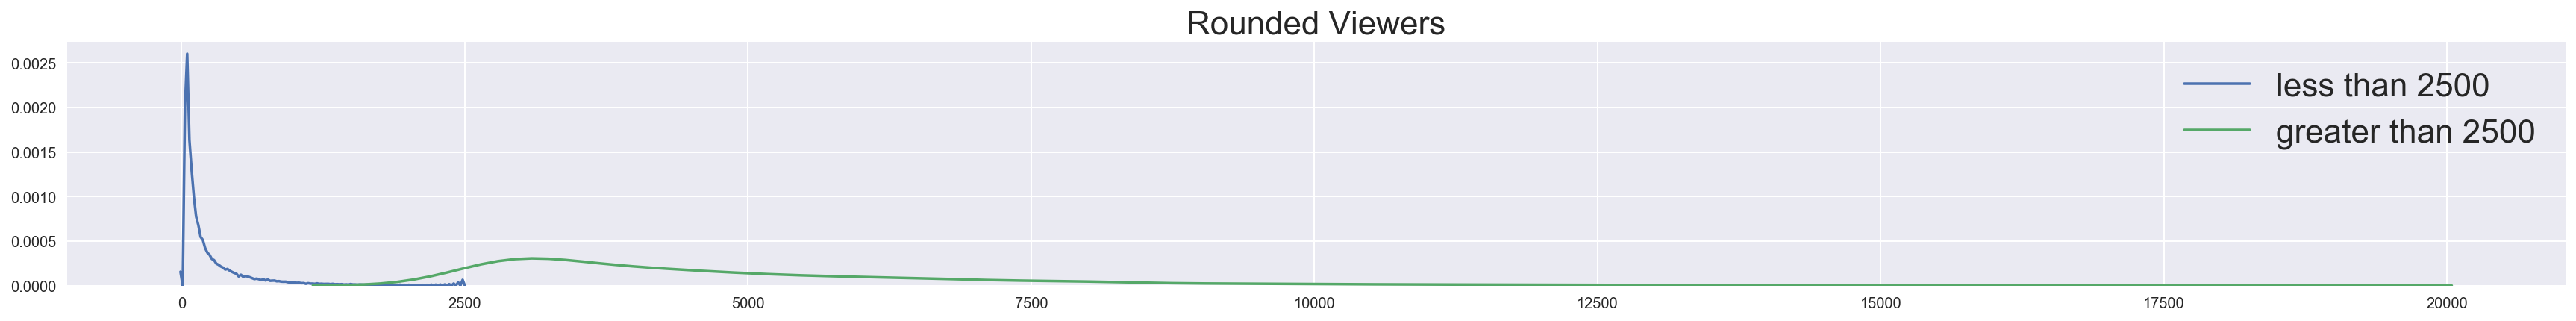

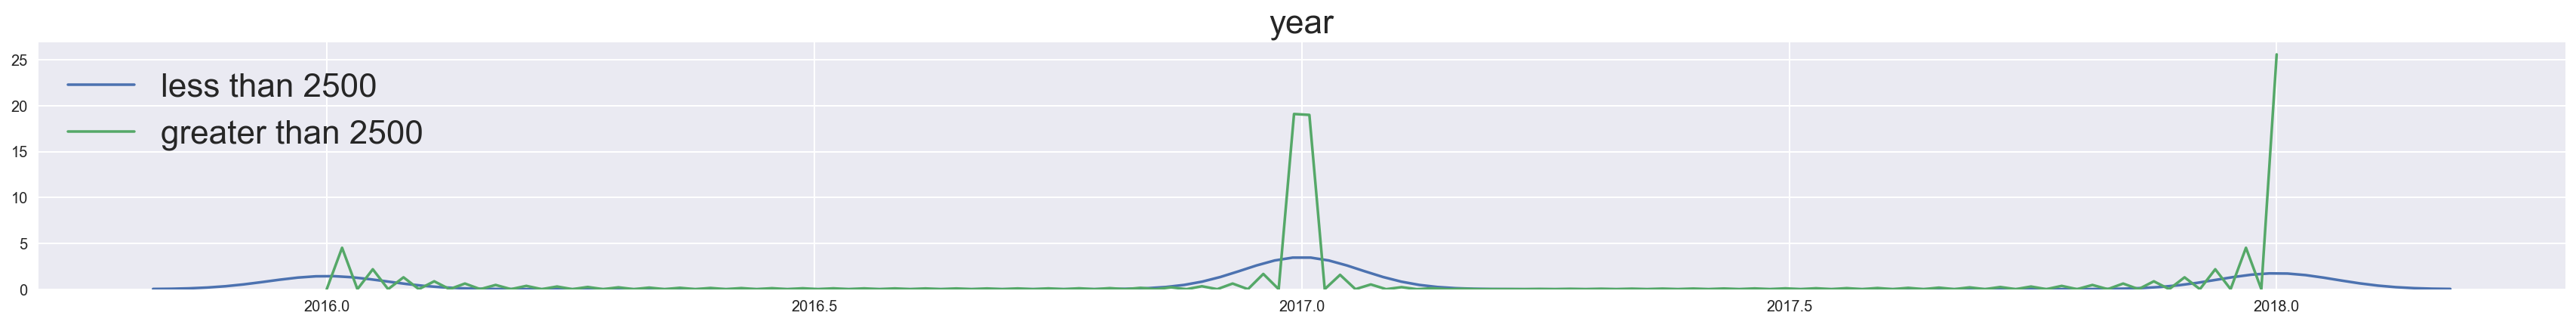

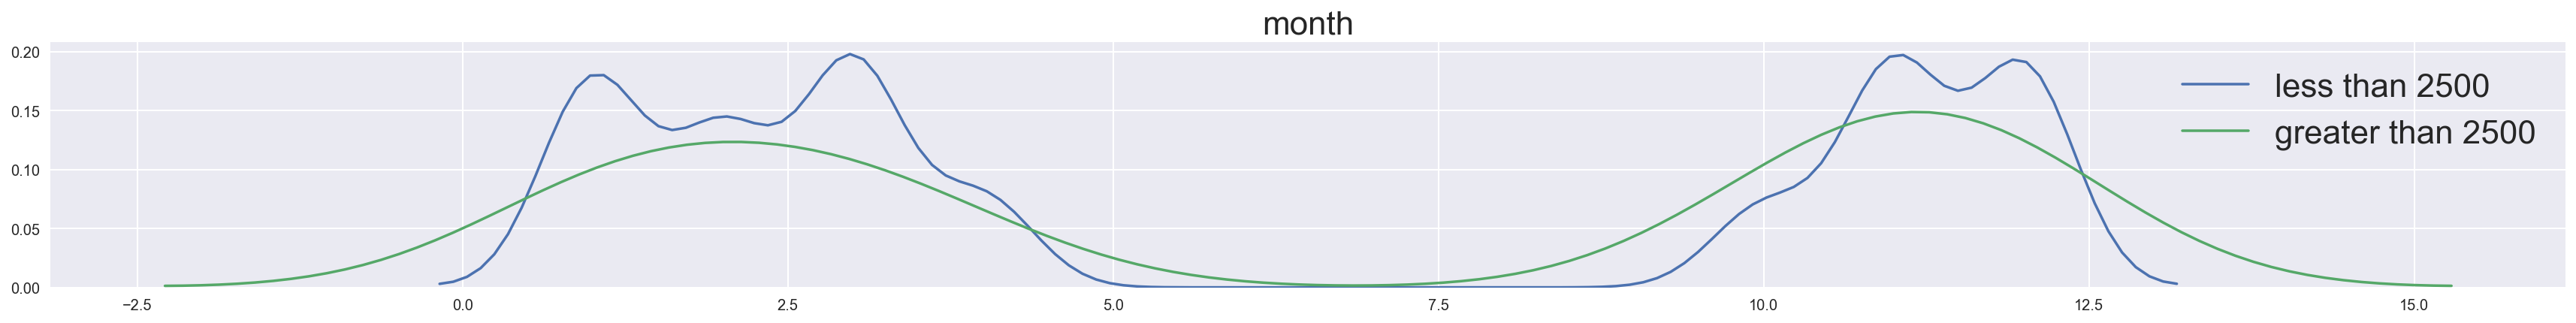

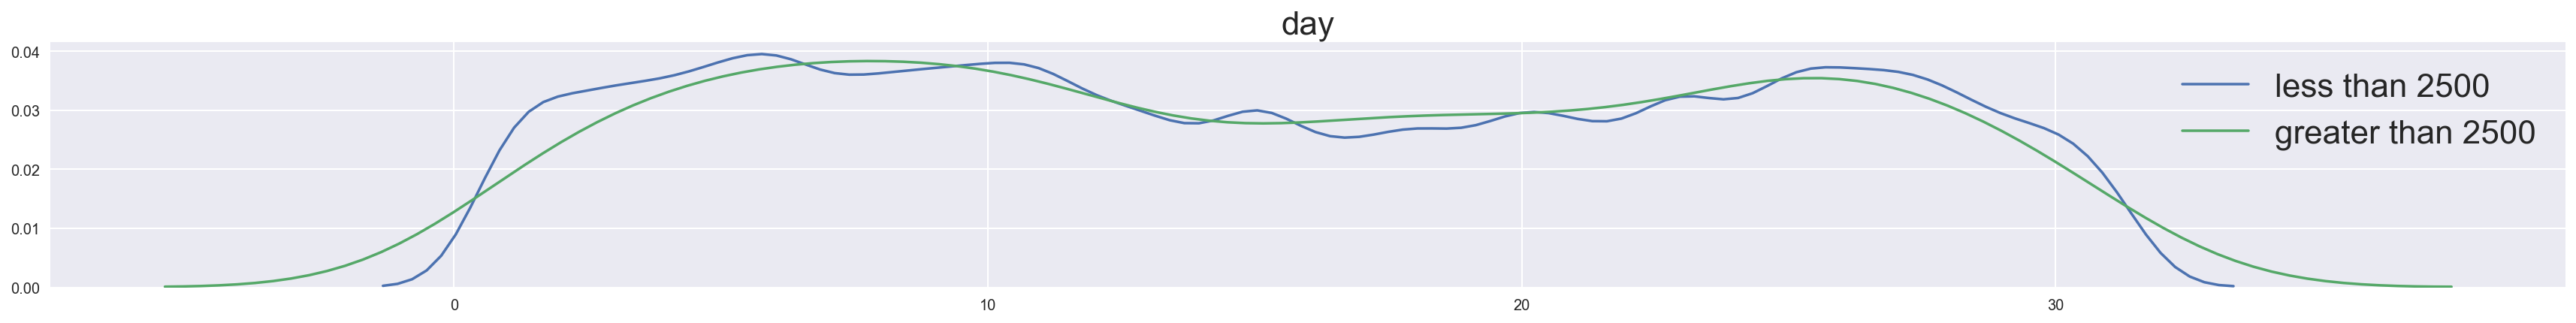

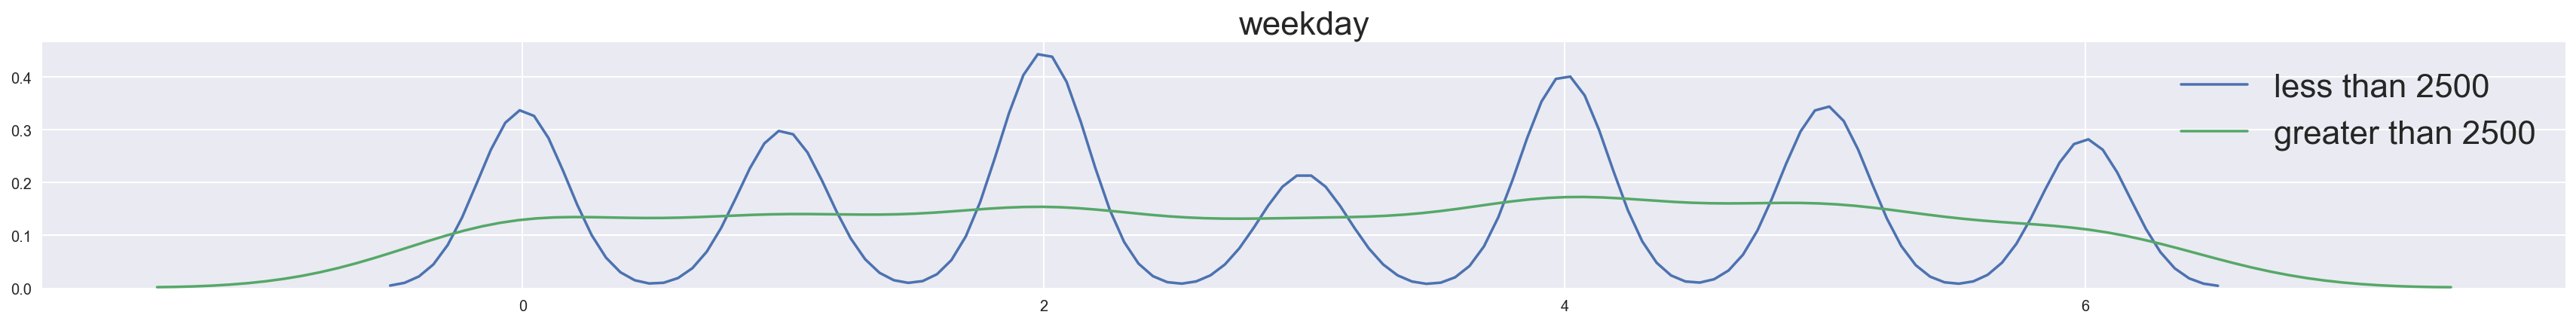

In [239]:
%matplotlib inline
for col in train_numerical_columns:
    plt.figure(figsize=(30,3))
    sns.kdeplot(train.loc[train['Rounded Viewers'] < 2500, col], label='less than 2500')
    sns.kdeplot(train.loc[train['Rounded Viewers'] > 2500, col], label='greater than 2500')
    plt.legend(fontsize=22)
    plt.title(col, fontsize=22);

In [283]:
games.columns

Index(['Season', 'Game_ID', 'Game_Date', 'Team', 'Location',
       'Wins_Entering_Gm', 'Losses_Entering_Gm', 'Team_Minutes', 'Final_Score',
       'Lead_Changes', 'Ties', 'Largest_Lead', 'Full_Timeouts',
       'Short_Timeouts', 'Qtr_4_Score', 'L2M_Score'],
      dtype='object')

In [299]:
train.columns

Index(['Season', 'Game_ID', 'Game_Date', 'Away_Team', 'Home_Team', 'Country',
       'Rounded Viewers', 'year', 'month', 'day', 'weekday', 'weekday_name'],
      dtype='object')

In [11]:
games.drop('Game_Date', inplace=True, axis=1)

combined = train.merge(games.drop('Short_Timeouts', axis=1), on=['Game_ID', 'Season'])
print(combined.isnull().sum())
combined.tail(10)

Season                0
Game_ID               0
Game_Date             0
Away_Team             0
Home_Team             0
Country               0
Rounded Viewers       0
year                  0
month                 0
day                   0
weekday               0
weekday_name          0
Team                  0
Location              0
Wins_Entering_Gm      0
Losses_Entering_Gm    0
Team_Minutes          0
Final_Score           0
Lead_Changes          0
Ties                  0
Largest_Lead          0
Full_Timeouts         0
Qtr_4_Score           0
L2M_Score             0
dtype: int64


,Season,Game_ID,Game_Date,Away_Team,Home_Team,Country,Rounded Viewers,year,month,day,...,Wins_Entering_Gm,Losses_Entering_Gm,Team_Minutes,Final_Score,Lead_Changes,Ties,Largest_Lead,Full_Timeouts,Qtr_4_Score,L2M_Score
561240,2017-18,21701221,2018-04-11,TOR,MIA,C181,602,2018,4,11,...,43,38,265.0,116.0,13.0,4.0,7.0,6.0,71.0,99.0
561241,2017-18,21701221,2018-04-11,TOR,MIA,C181,602,2018,4,11,...,59,22,265.0,109.0,12.0,6.0,11.0,7.0,78.0,99.0
561242,2017-18,21701221,2018-04-11,TOR,MIA,C202,53,2018,4,11,...,43,38,265.0,116.0,13.0,4.0,7.0,6.0,71.0,99.0
561243,2017-18,21701221,2018-04-11,TOR,MIA,C202,53,2018,4,11,...,59,22,265.0,109.0,12.0,6.0,11.0,7.0,78.0,99.0
561244,2017-18,21701221,2018-04-11,TOR,MIA,C32,10,2018,4,11,...,43,38,265.0,116.0,13.0,4.0,7.0,6.0,71.0,99.0
561245,2017-18,21701221,2018-04-11,TOR,MIA,C32,10,2018,4,11,...,59,22,265.0,109.0,12.0,6.0,11.0,7.0,78.0,99.0
561246,2017-18,21701221,2018-04-11,TOR,MIA,C168,20,2018,4,11,...,43,38,265.0,116.0,13.0,4.0,7.0,6.0,71.0,99.0
561247,2017-18,21701221,2018-04-11,TOR,MIA,C168,20,2018,4,11,...,59,22,265.0,109.0,12.0,6.0,11.0,7.0,78.0,99.0
561248,2017-18,21701221,2018-04-11,TOR,MIA,C137,3,2018,4,11,...,43,38,265.0,116.0,13.0,4.0,7.0,6.0,71.0,99.0
561249,2017-18,21701221,2018-04-11,TOR,MIA,C137,3,2018,4,11,...,59,22,265.0,109.0,12.0,6.0,11.0,7.0,78.0,99.0


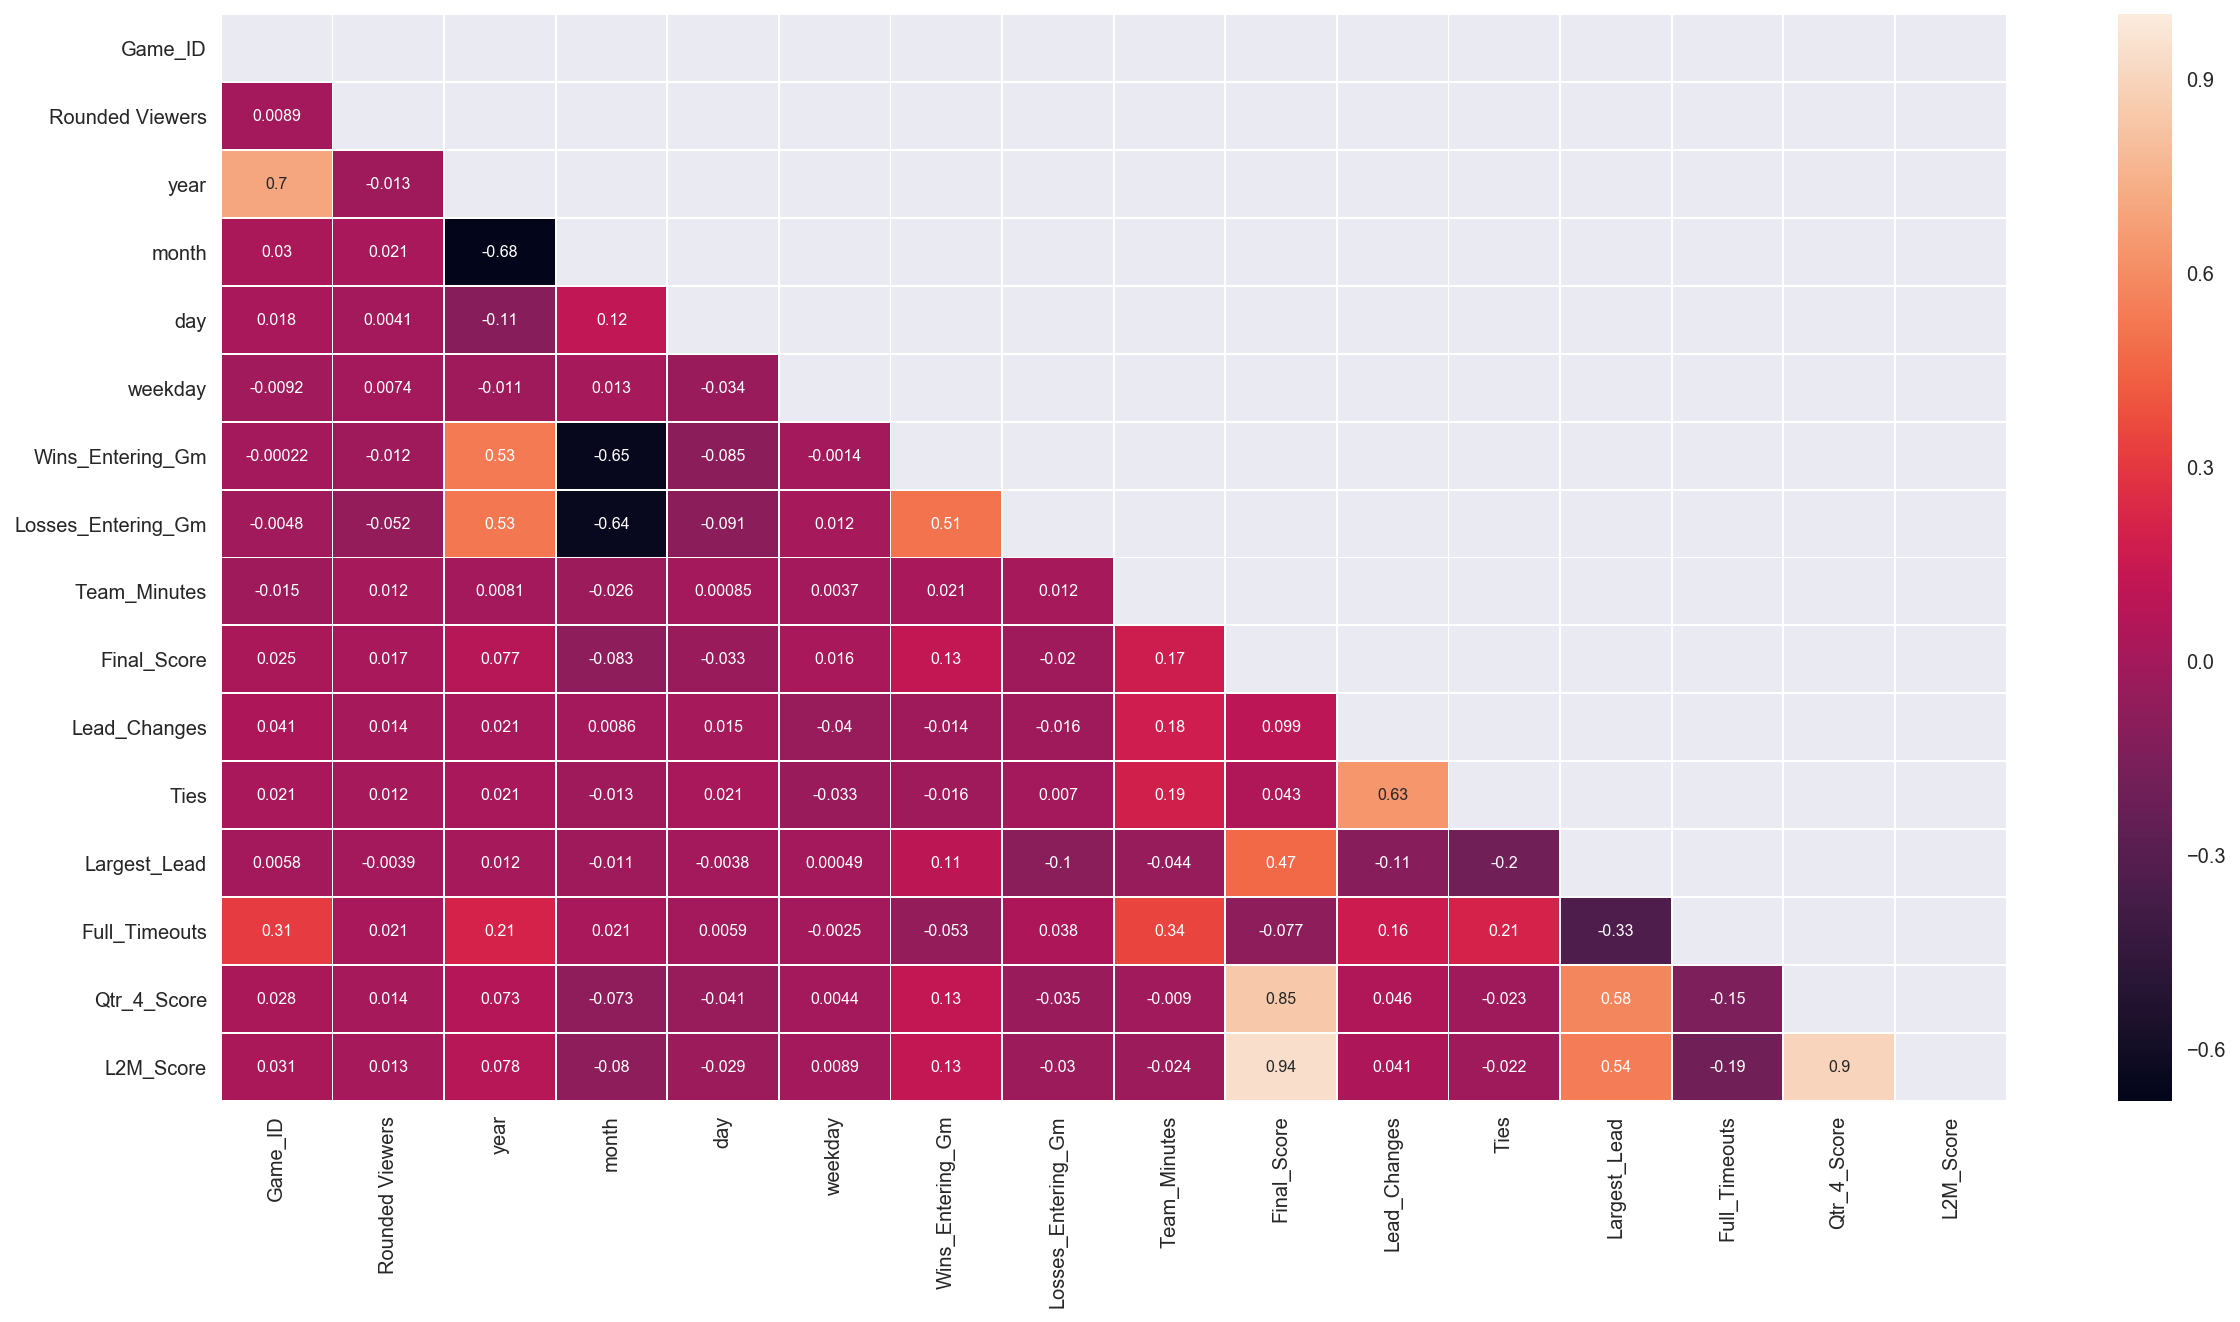

In [322]:
# combined.groupby('Game_ID')['Rounded Viewers'].sum()
sns.set(rc={"figure.figsize": (20, 10)})
corr = combined.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, annot=True, linewidth=0.5, mask=mask, annot_kws={"size": 8})

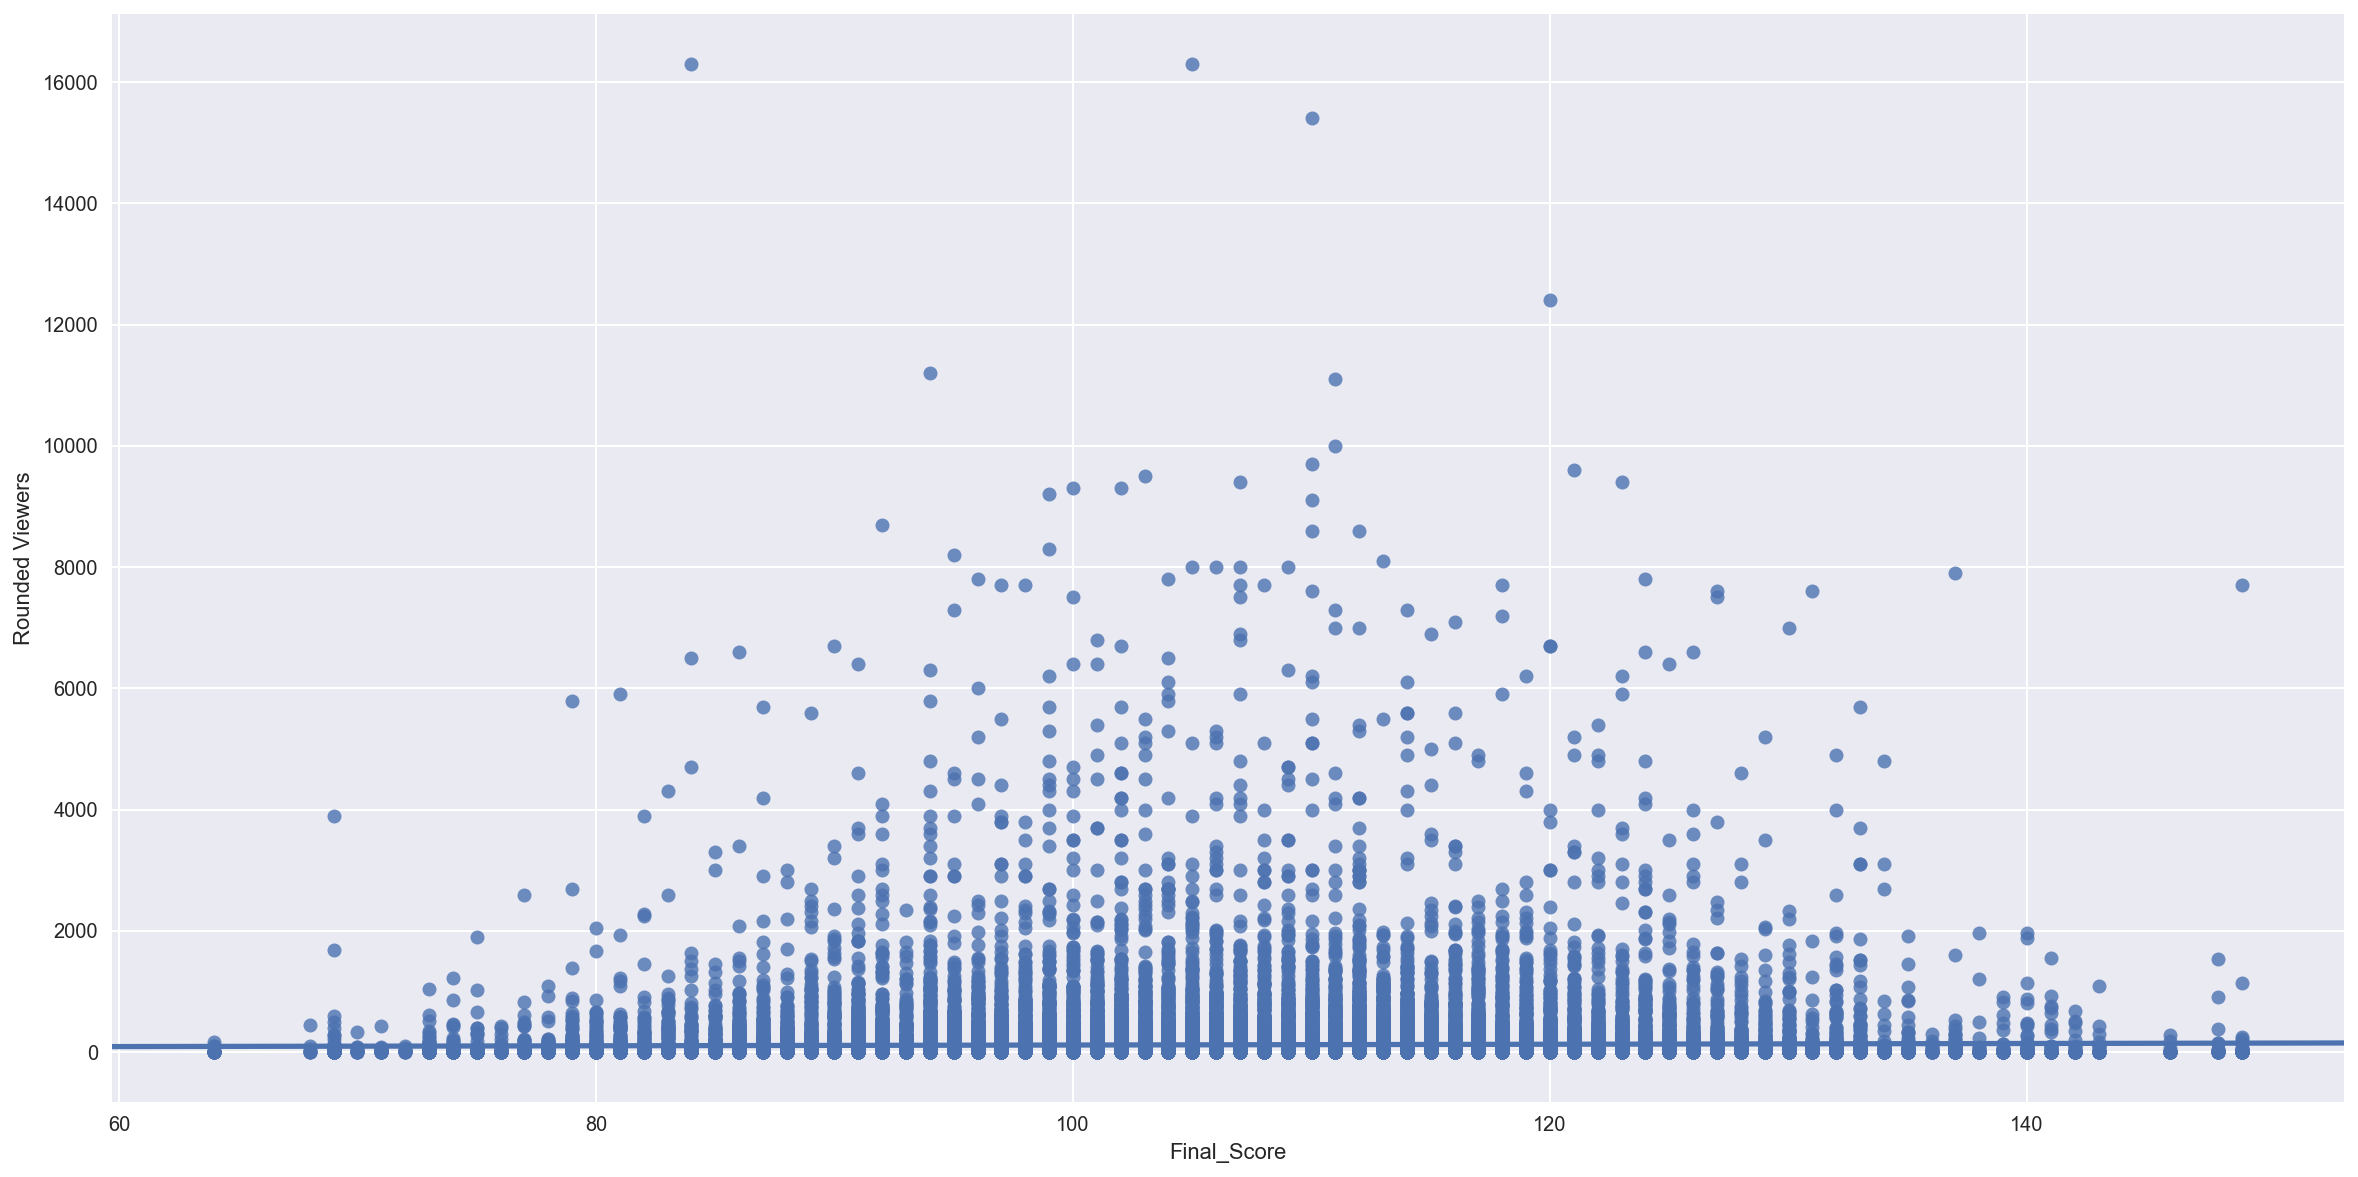

In [339]:
sns.regplot(x='Final_Score', y='Rounded Viewers', data=combined.sample(frac=.1))

(array([0.5, 1.5, 2.5, 3.5]), <a list of 4 Text xticklabel objects>)

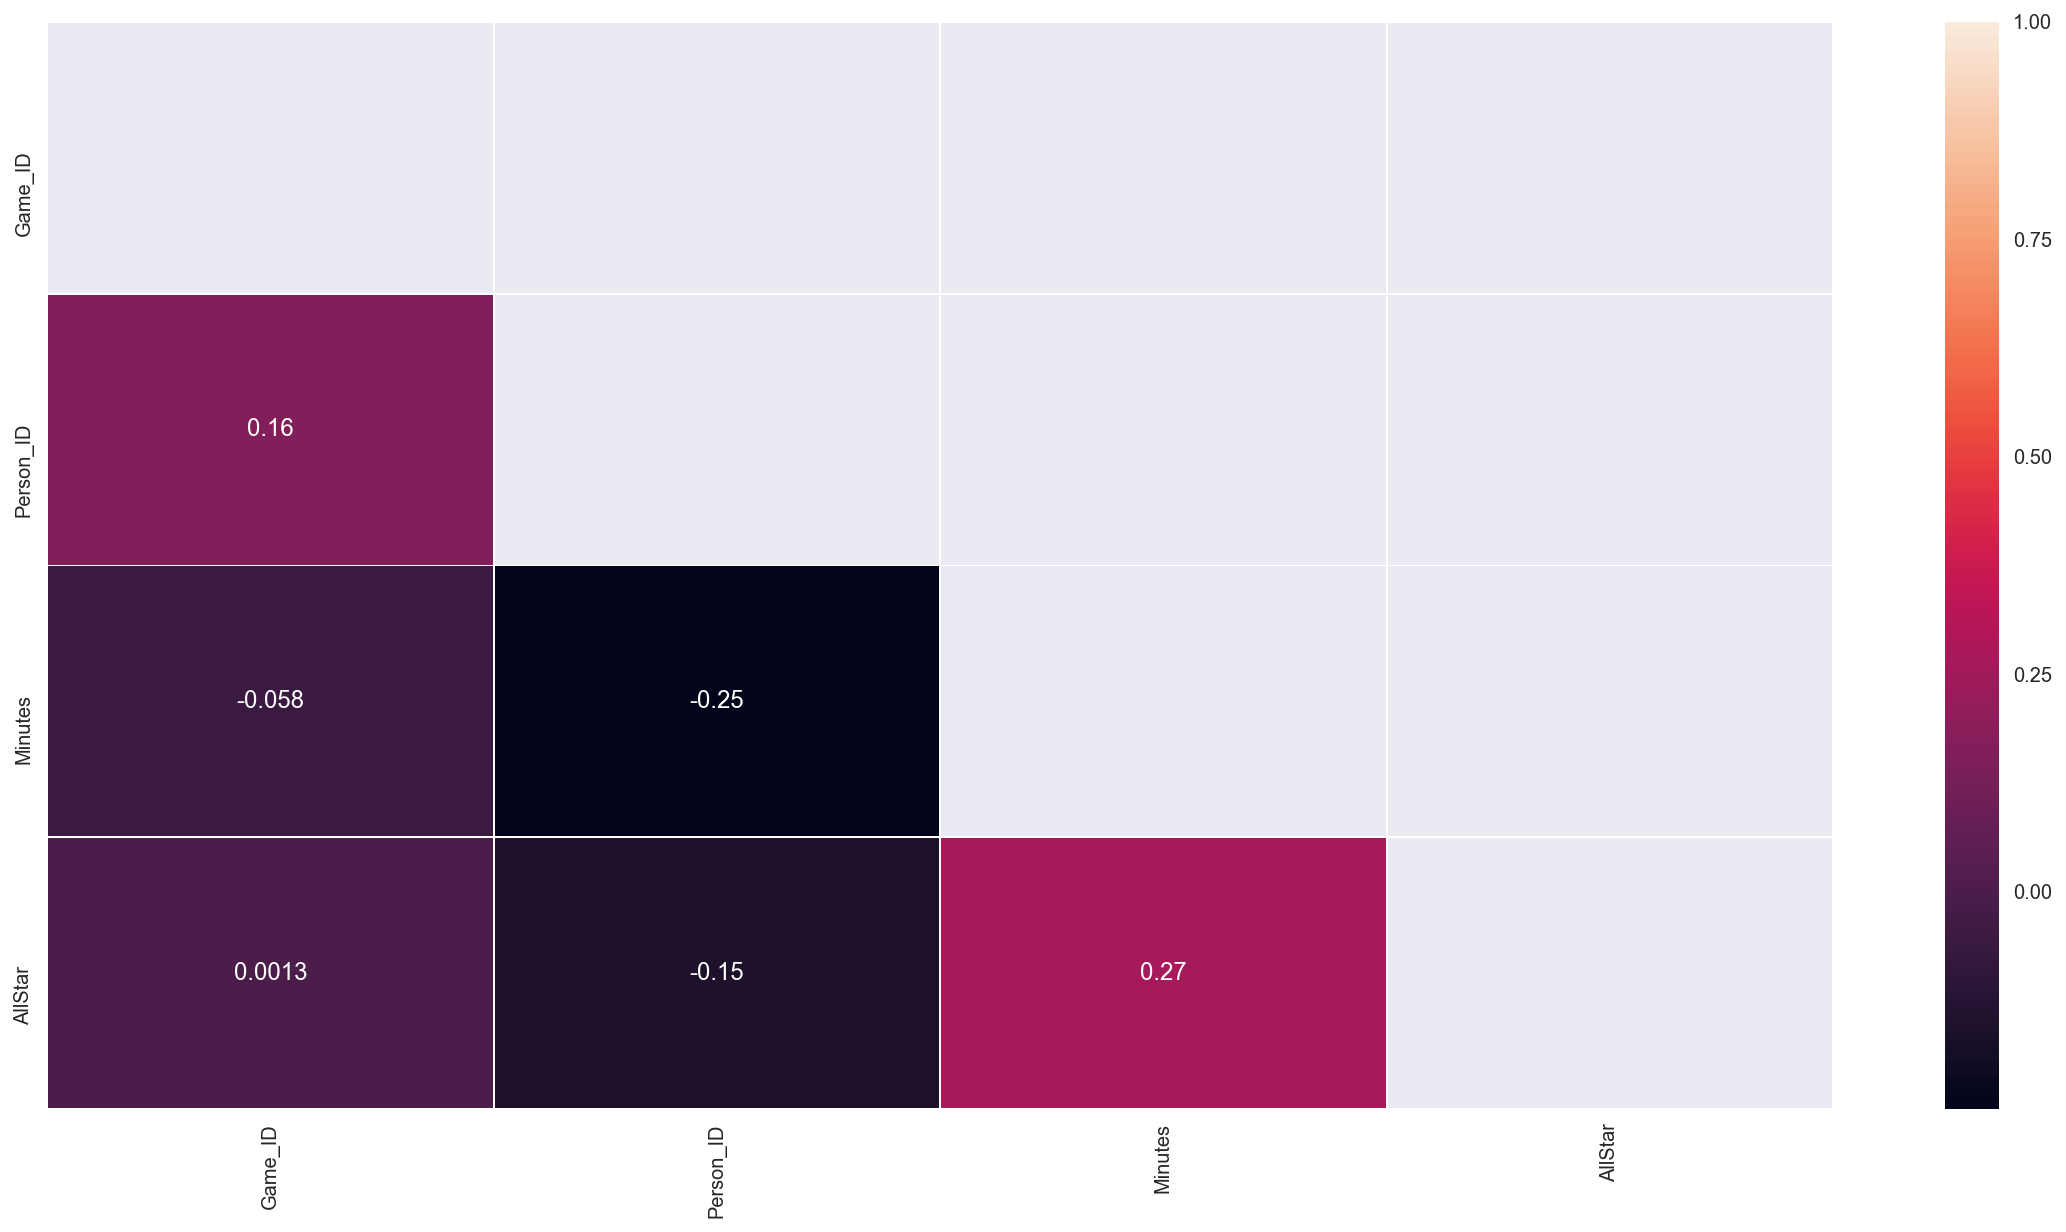

In [341]:
corr = players.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, annot=True, linewidth=0.5, mask=mask, annot_kws={"size": 12})
plt.xticks(rotation=90)

In [12]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import r2_score
from statsmodels.tools.tools import add_constant
from statsmodels.regression.linear_model import OLS
import time

combined.columns

Index(['Season', 'Game_ID', 'Game_Date', 'Away_Team', 'Home_Team', 'Country',
       'Rounded Viewers', 'year', 'month', 'day', 'weekday', 'weekday_name',
       'Team', 'Location', 'Wins_Entering_Gm', 'Losses_Entering_Gm',
       'Team_Minutes', 'Final_Score', 'Lead_Changes', 'Ties', 'Largest_Lead',
       'Full_Timeouts', 'Qtr_4_Score', 'L2M_Score'],
      dtype='object')

In [13]:
le = LabelEncoder()

combined['Team_Labeled'] = le.fit_transform(combined.Team)
combined['opponent_label'] = le.fit_transform(combined.Away_Team)
combined['country_label'] = le.fit_transform(combined.Country)
combined['home_label'] = le.fit_transform(combined.Home_Team)

In [15]:
combined_copy = combined

In [16]:
ss = StandardScaler()

X = combined_copy.drop(['Team', 'Home_Team', 'Away_Team', 'Rounded Viewers'], axis = 1)

In [18]:
X = X.drop(['Season', 'Game_Date', 'Country', 'weekday', 'Location', 'Game_ID', 'weekday_name'], axis = 1)

In [23]:
Xscaled = ss.fit_transform(X)

In [25]:
Xscaled = add_constant(Xscaled)

In [27]:
y = combined['Rounded Viewers']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(Xscaled, y, test_size = 0.3, random_state = 86)

In [29]:
lin_modellin_mode  = OLS(y_train, X_train).fit()

In [31]:
lin_pred = lin_modellin_mode.predict(X_test)
lin_model_score = r2_score(y_test, lin_pred)

print("R^2 score:", lin_model_score)

R^2 score: 0.006291182479367552


In [33]:
lin_modellin_mode.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Rounded Viewers   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     151.6
Date:                Sun, 24 Jun 2018   Prob (F-statistic):               0.00
Time:                        18:06:46   Log-Likelihood:            -2.9785e+06
No. Observations:              392875   AIC:                         5.957e+06
Df Residuals:                  392857   BIC:                         5.957e+06
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        121.5018      0.757    160.500      0.000     120.018     122.986
x1             2.1994      1.139      1.932      0.053      -0.032       4.431
x2            -4.7888      1.279     -3.744      0.000      -7.296      -2.282
x3             0.5531      0.764      0.724      0.469      -0.944       2.050
x4             6.7017      1.033      6.489      0.000       4.677       8.726
x5           -33.0180      1.026    -32.167      0.000     -35.030     -31.006
x6             0.7382      0.974      0.758      0.449      -1.171       2.647
x7             4.9887      2.857      1.746      0.081      -0.611      10.589
x8             2.5399      0.986      2.575      0.010       0.606       4.473
x9             0.4617      1.001      0.461      0.645      -1.500       2.423
x10           -8.9711      1.012     -8.860      0.000     -10.956      -6.987
x11            9.2812      0.941      9.862      0.000       7.437      11.126
x12            6.6197      1.787      3.705      0.000       3.118      10.122
x13           -0.8183      3.254     -0.251      0.801      -7.196       5.559
x14           -0.4082      1.051     -0.388      0.698      -2.468       1.652
x15           -5.2089      0.925     -5.631      0.000      -7.022      -3.396
x16          -22.1281      0.757    -29.237      0.000     -23.612     -20.645
x17           -5.1770      0.923     -5.610      0.000      -6.986      -3.368
==============================================================================
Omnibus:                   684181.248   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        870875658.467
Skew:                          12.349   Prob(JB):                         0.00
Kurtosis:                     232.325   Cond. No.                         10.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""